# Algoritmo MeanShift

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo MeanShift]()

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [2]:
from utils.alterar_dataset import deletar_valores_absurdos, preencher_valores_faltantes_linha
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from utils.parametros import ParametrosMeanshift
from sklearn.cluster import estimate_bandwidth
from models.meanshift import Meanshift
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [3]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

### DATASET Funcao Renal

In [3]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = df_funcao_renal, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500,
                          nro_threads = -1)
    meanshift.fit(df_funcao_renal)
    y_funcao_renal = meanshift.fit_predict(df_funcao_renal)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(df_funcao_renal, y_funcao_renal, metric = metrica))

    davies_bouldin = davies_bouldin_score(df_funcao_renal, y_funcao_renal)
    calinski = calinski_harabasz_score(df_funcao_renal, y_funcao_renal)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift.getLabels()))}")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [1.0, -0.00013345789403449188, 1.0, 1.0, 1.0, 1.0]
DAVIS-BOULDIN SCORE:  0.0
CALINSKI-HARABASZ SCORE:  1.0
QUANTIDADE DE GRUPOS: 25


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.767706173302503, 0.12370790505587803, 0.7645057772236232, 0.767706173302503, 0.7645057772236232, 0.767706173302503]
DAVIS-BOULDIN SCORE:  0.7393294782399168
CALINSKI-HARABASZ SCORE:  21579.78483257319
QUANTIDADE DE GRUPOS: 8


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.7820985425449464, 0.02397030346205312, 0.7738723041669752, 0.7820985425449464, 0.7738723041669752, 0.7820985425449464]
DAVIS-BOULDIN SCORE:  0.6926368214558204
CALINSKI-HARABASZ SCORE:  21912.91814080217
QUANTIDADE DE GRUPOS: 7


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.7445469068674132, 0.14252289831332657, 0.7189695777536332, 0.7445469068674132, 0.7189695777536332, 0.7445469068674132]
DAVIS-BOULDIN SCORE:  0.810804847773

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma, exceto "cityblock";
- quantil: 0.2;
- frequência mínima: 1;
- número máximo de iterações: 500;
- semente randômica: 42.

Com o número de clusteres: 5.

### DATASET Dieta Grupos

In [4]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = df_dieta_grupos, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500,
                          nro_threads = -1)
    meanshift.fit(df_dieta_grupos)
    y_dieta_grupos = meanshift.fit_predict(df_dieta_grupos)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(df_dieta_grupos, y_dieta_grupos, metric = metrica))

    davies_bouldin = davies_bouldin_score(df_dieta_grupos, y_dieta_grupos)
    calinski = calinski_harabasz_score(df_dieta_grupos, y_dieta_grupos)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift.getLabels()))}")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.14783360272991927, -0.586399347158496, 0.1893650130593205, 0.14783360272991927, 0.1893650130593205, 0.14783360272991927]
DAVIS-BOULDIN SCORE:  1.1763008775949684
CALINSKI-HARABASZ SCORE:  139.85322497688574
QUANTIDADE DE GRUPOS: 25


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.22561520282267178, -0.5916939477539512, 0.2421173795311405, 0.22561520282267178, 0.2421173795311405, 0.22561520282267178]
DAVIS-BOULDIN SCORE:  1.1147975968368442
CALINSKI-HARABASZ SCORE:  153.98846696197288
QUANTIDADE DE GRUPOS: 20


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.2386684790528939, -0.5870436959106852, 0.2645822490873655, 0.2386684790528939, 0.2645822490873655, 0.2386684790528939]
DAVIS-BOULDIN SCORE:  1.052293240060704
CALINSKI-HARABASZ SCORE:  134.09984291300785
QUANTIDADE DE GRUPOS: 16


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.24317731149290167, -0.5927387201841084, 0.3

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma, exceto "euclidean";
- quantil: 0.6;
- frequência mínima: 1;
- número máximo de iterações: 500;
- semente randômica: 42.

Com o número de clusteres: 6.

### DATASET Perfil Hepatico

In [5]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = df_perfil_hepatico, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500,
                          nro_threads = -1)
    meanshift.fit(df_perfil_hepatico)
    y_perfil_hepatico = meanshift.fit_predict(df_perfil_hepatico)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(df_perfil_hepatico, y_perfil_hepatico, metric = metrica))

    davies_bouldin = davies_bouldin_score(df_perfil_hepatico, y_perfil_hepatico)
    calinski = calinski_harabasz_score(df_perfil_hepatico, y_perfil_hepatico)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift.getLabels()))}")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5591197380759249, -0.09945565098983042, 0.5273898315871121, 0.5591197380759249, 0.5273898315871121, 0.5591197380759249]
DAVIS-BOULDIN SCORE:  1.1573282447520783
CALINSKI-HARABASZ SCORE:  1696.3939534258216
QUANTIDADE DE GRUPOS: 33


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5630997029087442, -0.085850168073472, 0.5319133748993254, 0.5630997029087442, 0.5319133748993254, 0.5630997029087442]
DAVIS-BOULDIN SCORE:  1.2716137520125304
CALINSKI-HARABASZ SCORE:  1753.888294547341
QUANTIDADE DE GRUPOS: 26


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5788718316128073, -0.09457566982501672, 0.5391172113839361, 0.5788718316128073, 0.5391172113839361, 0.5788718316128073]
DAVIS-BOULDIN SCORE:  1.203818111350865
CALINSKI-HARABASZ SCORE:  3009.7597145498235
QUANTIDADE DE GRUPOS: 13


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5998464517668343, -0.07679397691067627, 0.568042

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma, exceto "cityblock";
- quantil: 0.6;
- frequência mínima: 1;
- número máximo de iterações: 500;
- semente randômica: 42.

Com o número de clusteres: 2.

### DATASET ureia

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [6]:
novo_df_ureia_tratado = deletar_valores_absurdos(df_ureia, df_ureia.max().max())
novo_df_ureia_tratado.max()

ureia_dia_1    212.0
ureia_dia_2    162.0
ureia_dia_3    171.0
ureia_dia_4    184.0
ureia_dia_5    182.0
ureia_dia_6    206.0
ureia_dia_7    195.0
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [7]:
novo_df_ureia_tratado = preencher_valores_faltantes_linha(novo_df_ureia_tratado)
novo_df_ureia_tratado.head(10)

,ureia_dia_1,ureia_dia_2,ureia_dia_3,ureia_dia_4,ureia_dia_5,ureia_dia_6,ureia_dia_7
subject_id,,,,,,,
10001884,30.0,30.0,38.0,31.0,26.0,22.0,14.0
10004422,21.0,13.0,17.0,16.0,20.0,24.0,24.0
10004733,44.0,41.0,39.0,37.0,28.0,26.0,28.0
10005606,6.0,6.0,10.0,6.0,11.0,11.0,15.0
10010867,8.0,5.0,5.0,5.0,6.0,7.0,9.0
10019777,17.0,22.0,16.0,19.0,18.0,17.0,16.0
10020944,34.0,28.0,26.0,22.0,21.0,20.0,19.0
10023486,42.0,48.0,54.0,63.0,68.0,69.0,70.0
10032381,9.0,9.0,9.0,14.0,21.0,24.0,26.0


In [8]:
novo_df_ureia_tratado.isna().sum()

ureia_dia_1    21
ureia_dia_2     2
ureia_dia_3     5
ureia_dia_4     5
ureia_dia_5     7
ureia_dia_6    12
ureia_dia_7    32
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [9]:
novo_df_ureia_tratado[novo_df_ureia_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10583686, 10615339, 10996857,
       11542534, 11611745, 11638303, 11663336, 11833476, 12344021, 12374214,
       12606435, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18213765, 18560897,
       18638524, 18757959, 18976063, 19392949, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [10]:
novo_df_ureia_tratado = novo_df_ureia_tratado.dropna(axis = 0)
novo_df_ureia_tratado.isna().sum().sum()

0

#### Testando o dataset

In [14]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = novo_df_ureia_tratado, quantile = quantil, random_state = 42, n_jobs = -1)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 1200,
                          nro_threads = -1)
    meanshift.fit(novo_df_ureia_tratado)
    y_ureia = meanshift.predict(novo_df_ureia_tratado)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(novo_df_ureia_tratado, y_ureia, metric = metrica))

    davies_bouldin = davies_bouldin_score(novo_df_ureia_tratado, y_ureia)
    calinski = calinski_harabasz_score(novo_df_ureia_tratado, y_ureia)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift.getLabels()))}")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.3501187052067762, -0.7908135074153225, 0.36335722546221205, 0.3501187052067762, 0.36335722546221205, 0.3501187052067762]
DAVIS-BOULDIN SCORE:  0.9252779058828404
CALINSKI-HARABASZ SCORE:  257.4793527545113
QUANTIDADE DE GRUPOS: 38


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.42387133969091256, -0.7817387514013644, 0.4239396458445569, 0.42387133969091256, 0.4239396458445569, 0.42387133969091256]
DAVIS-BOULDIN SCORE:  1.1192592651480433
CALINSKI-HARABASZ SCORE:  283.93565626670755
QUANTIDADE DE GRUPOS: 27


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.44536513846576037, -0.7613535965900691, 0.4715205655617684, 0.44536513846576037, 0.4715205655617684, 0.44536513846576037]
DAVIS-BOULDIN SCORE:  0.9504426513215882
CALINSKI-HARABASZ SCORE:  297.20444545103874
QUANTIDADE DE GRUPOS: 20


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.40905427539319394, -0.7105289546748877, 

Como podemos notar acima, os melhores parâmetros são:
- métrica: l1;
- quantil: 0.6;
- frequência mínima: 1;
- número máximo de iterações: 1200;
- semente randômica: 42.

Com o número de clusteres: 2.

### DATASET creatinina

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [14]:
novo_df_creatinina_tratado = deletar_valores_absurdos(df_creatinina, df_creatinina.max().max())
novo_df_creatinina_tratado.max()

creatinina_dia_1    117.0
creatinina_dia_2     16.0
creatinina_dia_3     15.0
creatinina_dia_4     14.6
creatinina_dia_5     14.7
creatinina_dia_6     15.2
creatinina_dia_7     15.6
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [15]:
novo_df_creatinina_tratado = preencher_valores_faltantes_linha(novo_df_creatinina_tratado)
novo_df_creatinina_tratado.head(10)

,creatinina_dia_1,creatinina_dia_2,creatinina_dia_3,creatinina_dia_4,creatinina_dia_5,creatinina_dia_6,creatinina_dia_7
subject_id,,,,,,,
10001884,1.1,1.1,1.3,0.9,0.8,0.6,0.5
10004422,0.7,0.7,0.7,0.6,0.6,0.7,0.7
10004733,3.4,3.8,3.7,3.4,2.6,2.6,2.7
10005606,0.7,0.6,0.5,0.4,0.5,0.5,0.5
10010867,0.7,0.7,0.5,0.3,0.4,0.5,0.5
10019777,0.9,0.7,0.9,0.8,0.7,0.6,0.5
10020944,1.4,1.6,1.8,1.6,1.5,1.8,1.6
10023486,3.1,3.4,3.2,3.4,2.8,2.2,1.9
10032381,1.3,1.2,1.2,1.2,1.2,1.2,1.2


In [16]:
novo_df_creatinina_tratado.isna().sum()

creatinina_dia_1    17
creatinina_dia_2     2
creatinina_dia_3     5
creatinina_dia_4     5
creatinina_dia_5     7
creatinina_dia_6    12
creatinina_dia_7    33
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [17]:
novo_df_creatinina_tratado[novo_df_creatinina_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10615339, 10996857, 11542534,
       11611745, 11638303, 11663336, 11833476, 12344021, 12374214, 12606435,
       12917345, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18560897, 18638524,
       18757959, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [18]:
novo_df_creatinina_tratado = novo_df_creatinina_tratado.dropna(axis = 0)
novo_df_creatinina_tratado.isna().sum().sum()

0

#### Testando o dataset

In [24]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = novo_df_creatinina_tratado, quantile = quantil, random_state = 42, n_jobs = -1)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 1200,
                          nro_threads = -1)
    meanshift.fit(novo_df_creatinina_tratado)
    y_creatinina = meanshift.predict(novo_df_creatinina_tratado)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(novo_df_creatinina_tratado, y_creatinina, metric = metrica))

    davies_bouldin = davies_bouldin_score(novo_df_creatinina_tratado, y_creatinina)
    calinski = calinski_harabasz_score(novo_df_creatinina_tratado, y_creatinina)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift.getLabels()))}")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.4730360482581453, -0.8061576422166221, 0.4841037330338197, 0.4730360482581453, 0.4841037330338197, 0.4730360482581453]
DAVIS-BOULDIN SCORE:  0.6957417492883807
CALINSKI-HARABASZ SCORE:  172.5696658895079
QUANTIDADE DE GRUPOS: 106


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.4947405065769635, -0.7997224462605007, 0.49542664296485983, 0.4947405065769635, 0.49542664296485983, 0.4947405065769635]
DAVIS-BOULDIN SCORE:  0.7156134314371138
CALINSKI-HARABASZ SCORE:  208.3856170877336
QUANTIDADE DE GRUPOS: 84


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5021075343189514, -0.78849429478645, 0.5030791407470235, 0.5021075343189514, 0.5030791407470235, 0.5021075343189514]
DAVIS-BOULDIN SCORE:  0.7386802735785525
CALINSKI-HARABASZ SCORE:  225.67775392689506
QUANTIDADE DE GRUPOS: 75


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5528931659702135, -0.7918165768527415, 0.5546415

Como podemos notar acima, os melhores parâmetros são:
- métrica: l2;
- quantil: 0.6;
- frequência mínima: 1;
- número máximo de iterações: 1200;
- semente randômica: 42.

Com o número de clusteres: 30.

## Implementação do Algoritmo

### DATASET Funcao Renal

#### Recebendo os hiper-parâmetros testados acima

In [25]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "funcao_renal")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [35]:
bandwidth = estimate_bandwidth(X = df_funcao_renal.values,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica(),
                               n_jobs = -1)

meanshift_funcao_renal = Meanshift(bandwidth = bandwidth,
                                   usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                   frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                   clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                   nro_threads = hiperparametros_meanshift.getNro_threads(),
                                   nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_funcao_renal.fit(df_funcao_renal.values)
y_funcao_renal = meanshift_funcao_renal.fit_predict(df_funcao_renal.values)

##### Verificando resultados do modelo

In [36]:
silhouette = silhouette_score(df_funcao_renal.values, y_funcao_renal, metric = "cityblock")
davies_bouldin = davies_bouldin_score(df_funcao_renal.values, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal.values, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.878551043460099
DAVIS-BOULDIN SCORE:  0.6012694218729446
CALINSKI-HARABASZ SCORE:  36249.40726125835


##### Quantidade de grupos gerado

In [37]:
print("Quantidade de Grupos:", len(np.unique(y_funcao_renal)))

Quantidade de Grupos: 16


##### Versão Gráfica

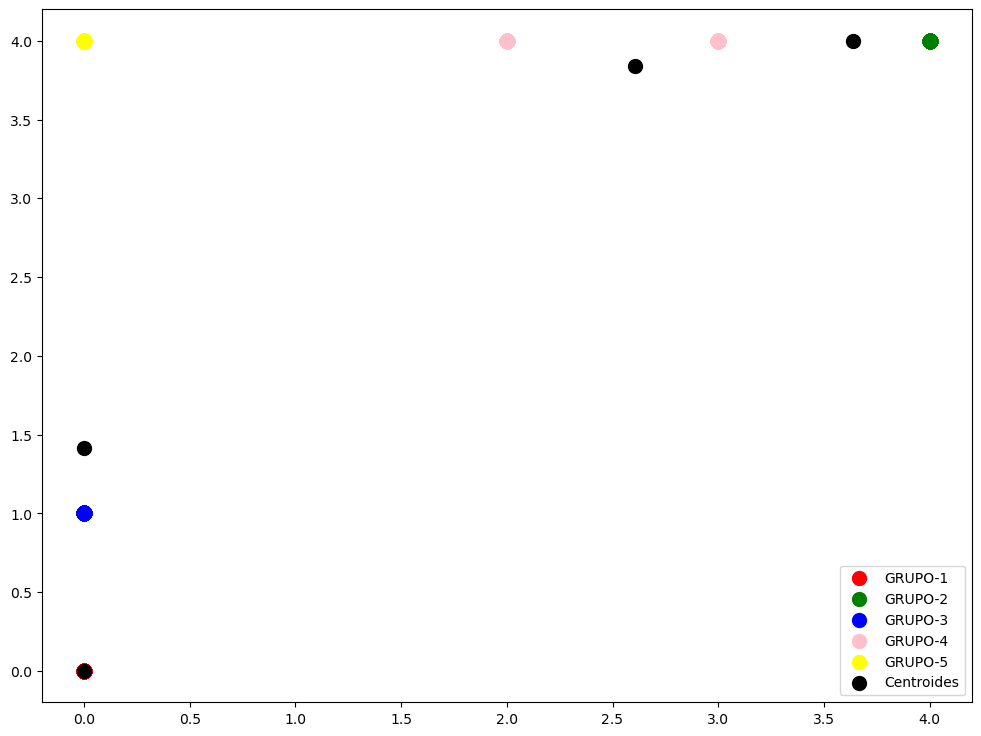

In [38]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(df_funcao_renal.values[y_funcao_renal == 0, 0], df_funcao_renal.values[y_funcao_renal == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_funcao_renal.values[y_funcao_renal == 1, 0], df_funcao_renal.values[y_funcao_renal == 1, 1], s = 100, c = "green", label = "GRUPO-2")
plt.scatter(df_funcao_renal.values[y_funcao_renal == 2, 0], df_funcao_renal.values[y_funcao_renal == 2, 1], s = 100, c = "blue", label = "GRUPO-3")
plt.scatter(df_funcao_renal.values[y_funcao_renal == 3, 0], df_funcao_renal.values[y_funcao_renal == 3, 1], s = 100, c = "pink", label = "GRUPO-4")
plt.scatter(df_funcao_renal.values[y_funcao_renal == 4, 0], df_funcao_renal.values[y_funcao_renal == 4, 1], s = 100, c = "yellow", label = "GRUPO-5")

### OS CENTROIDES
plt.scatter(meanshift_funcao_renal.getCentroides()[:, 0], meanshift_funcao_renal.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

### DATASET Dieta Grupos

#### Recebendo os hiper-parâmetros testados acima

In [39]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "dieta_grupos")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [40]:
bandwidth = estimate_bandwidth(X = df_dieta_grupos.values,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica(),
                               n_jobs = -1)

meanshift_dieta_grupos = Meanshift(bandwidth = bandwidth,
                                   usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                   frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                   clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                   nro_threads = hiperparametros_meanshift.getNro_threads(),
                                   nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_dieta_grupos.fit(df_dieta_grupos.values)
y_dieta_grupos = meanshift_dieta_grupos.fit_predict(df_dieta_grupos.values)

##### Verificando resultados do modelo

In [41]:
silhouette = silhouette_score(df_dieta_grupos.values, y_dieta_grupos, metric = "euclidean")
davies_bouldin = davies_bouldin_score(df_dieta_grupos.values, y_dieta_grupos)
calinski = calinski_harabasz_score(df_dieta_grupos.values, y_dieta_grupos)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.6363630240666491
DAVIS-BOULDIN SCORE:  0.9513520035275501
CALINSKI-HARABASZ SCORE:  45.338656719227124


##### Quantidade de grupos gerado

In [42]:
print("Quantidade de Grupos:", len(np.unique(y_dieta_grupos)))

Quantidade de Grupos: 4


##### Versão Gráfica

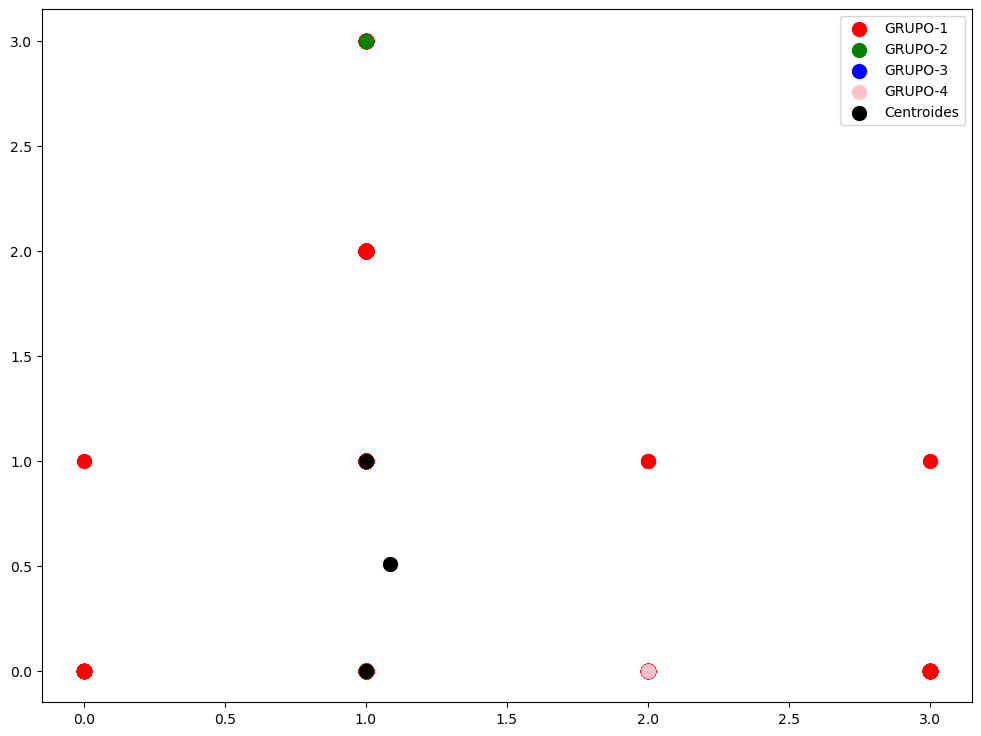

In [44]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(df_dieta_grupos.values[y_dieta_grupos == 0, 0], df_dieta_grupos.values[y_dieta_grupos == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_dieta_grupos.values[y_dieta_grupos == 1, 0], df_dieta_grupos.values[y_dieta_grupos == 1, 1], s = 100, c = "green", label = "GRUPO-2")
plt.scatter(df_dieta_grupos.values[y_dieta_grupos == 2, 0], df_dieta_grupos.values[y_dieta_grupos == 2, 1], s = 100, c = "blue", label = "GRUPO-3")
plt.scatter(df_dieta_grupos.values[y_dieta_grupos == 3, 0], df_dieta_grupos.values[y_dieta_grupos == 3, 1], s = 100, c = "pink", label = "GRUPO-4")

### OS CENTROIDES
plt.scatter(meanshift_dieta_grupos.getCentroides()[:, 0], meanshift_dieta_grupos.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

### DATASET Perfil Hepatico

#### Recebendo os hiper-parâmetros testados acima

In [45]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "perfil_hepatico")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [46]:
bandwidth = estimate_bandwidth(X = df_perfil_hepatico,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica(),
                               n_jobs = -1)

meanshift_perfil_hepatico = Meanshift(bandwidth = bandwidth,
                                      usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                      frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                      clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                      nro_threads = hiperparametros_meanshift.getNro_threads(),
                                      nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_perfil_hepatico.fit(df_perfil_hepatico.values)
y_perfil_hepatico = meanshift_perfil_hepatico.fit_predict(df_perfil_hepatico.values)

##### Verificando resultados do modelo

In [47]:
silhouette = silhouette_score(df_perfil_hepatico.values, y_perfil_hepatico, metric = "cityblock")
davies_bouldin = davies_bouldin_score(df_perfil_hepatico.values, y_perfil_hepatico)
calinski = calinski_harabasz_score(df_perfil_hepatico.values, y_perfil_hepatico)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.6509502312202577
DAVIS-BOULDIN SCORE:  0.8395679711104772
CALINSKI-HARABASZ SCORE:  8324.27521262369


##### Quantidade de grupos gerado

In [48]:
print("Quantidade de Grupos:", len(np.unique(y_perfil_hepatico)))

Quantidade de Grupos: 2


##### Versão Gráfica

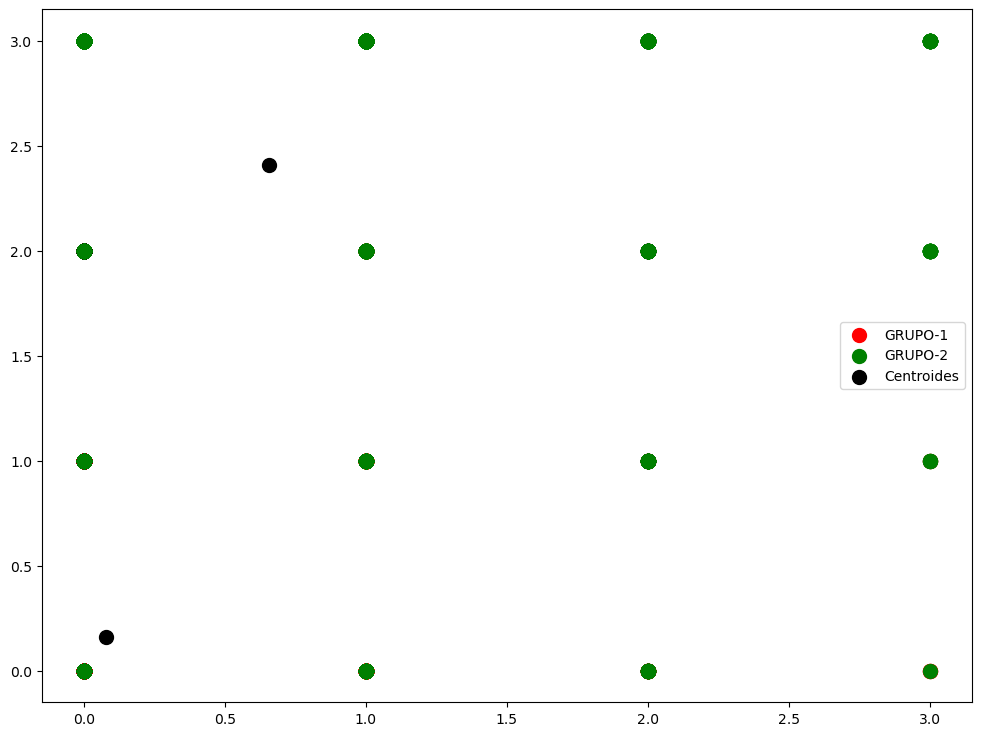

In [49]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(df_perfil_hepatico.values[y_perfil_hepatico == 0, 0], df_perfil_hepatico.values[y_perfil_hepatico == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_perfil_hepatico.values[y_perfil_hepatico == 1, 0], df_perfil_hepatico.values[y_perfil_hepatico == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(meanshift_perfil_hepatico.getCentroides()[:, 0], meanshift_perfil_hepatico.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

### DATASET ureia

#### Recebendo os hiper-parâmetros testados acima

In [37]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "ureia")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [38]:
bandwidth = estimate_bandwidth(X = novo_df_ureia_tratado,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica(),
                               n_jobs = -1)

meanshift_ureia = Meanshift(bandwidth = bandwidth,
                            usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                            frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                            clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                            nro_threads = hiperparametros_meanshift.getNro_threads(),
                            nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_ureia.fit(novo_df_ureia_tratado)
y_ureia = meanshift_ureia.predict(novo_df_ureia_tratado)

##### Verificando resultados do modelo

In [39]:
if len(np.unique(meanshift_ureia.getLabels())) > 1:
    silhouette = silhouette_score(novo_df_ureia_tratado, y_ureia, metric = "cityblock")
    davies_bouldin = davies_bouldin_score(novo_df_ureia_tratado, y_ureia)
    calinski = calinski_harabasz_score(novo_df_ureia_tratado, y_ureia)

    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.6829472306055966
DAVIS-BOULDIN SCORE:  0.4994504571080698
CALINSKI-HARABASZ SCORE:  680.9836654851038


##### Quantidade de grupos gerado

In [40]:
print("Quantidade de Grupos:", len(np.unique(y_ureia)))

Quantidade de Grupos: 2


##### Versão Gráfica

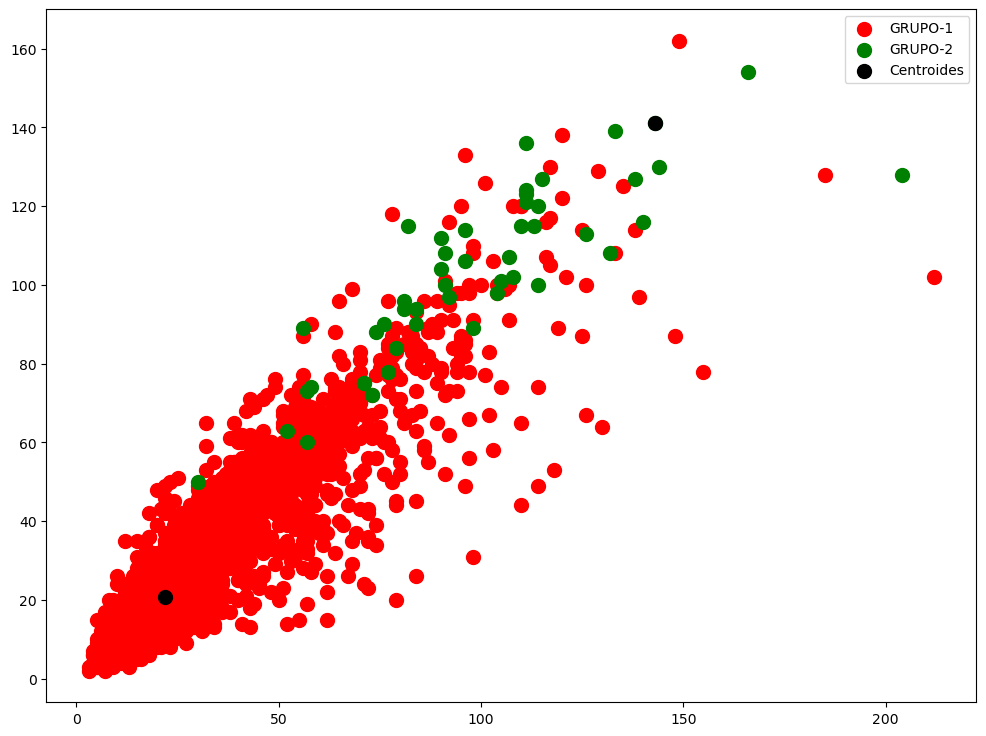

In [41]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(novo_df_ureia_tratado.values[y_ureia == 0, 0], novo_df_ureia_tratado.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(novo_df_ureia_tratado.values[y_ureia == 1, 0], novo_df_ureia_tratado.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(meanshift_ureia.getCentroides()[:, 0], meanshift_ureia.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

/tmp/ipykernel_26242/3935361738.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1200x900 with 0 Axes>

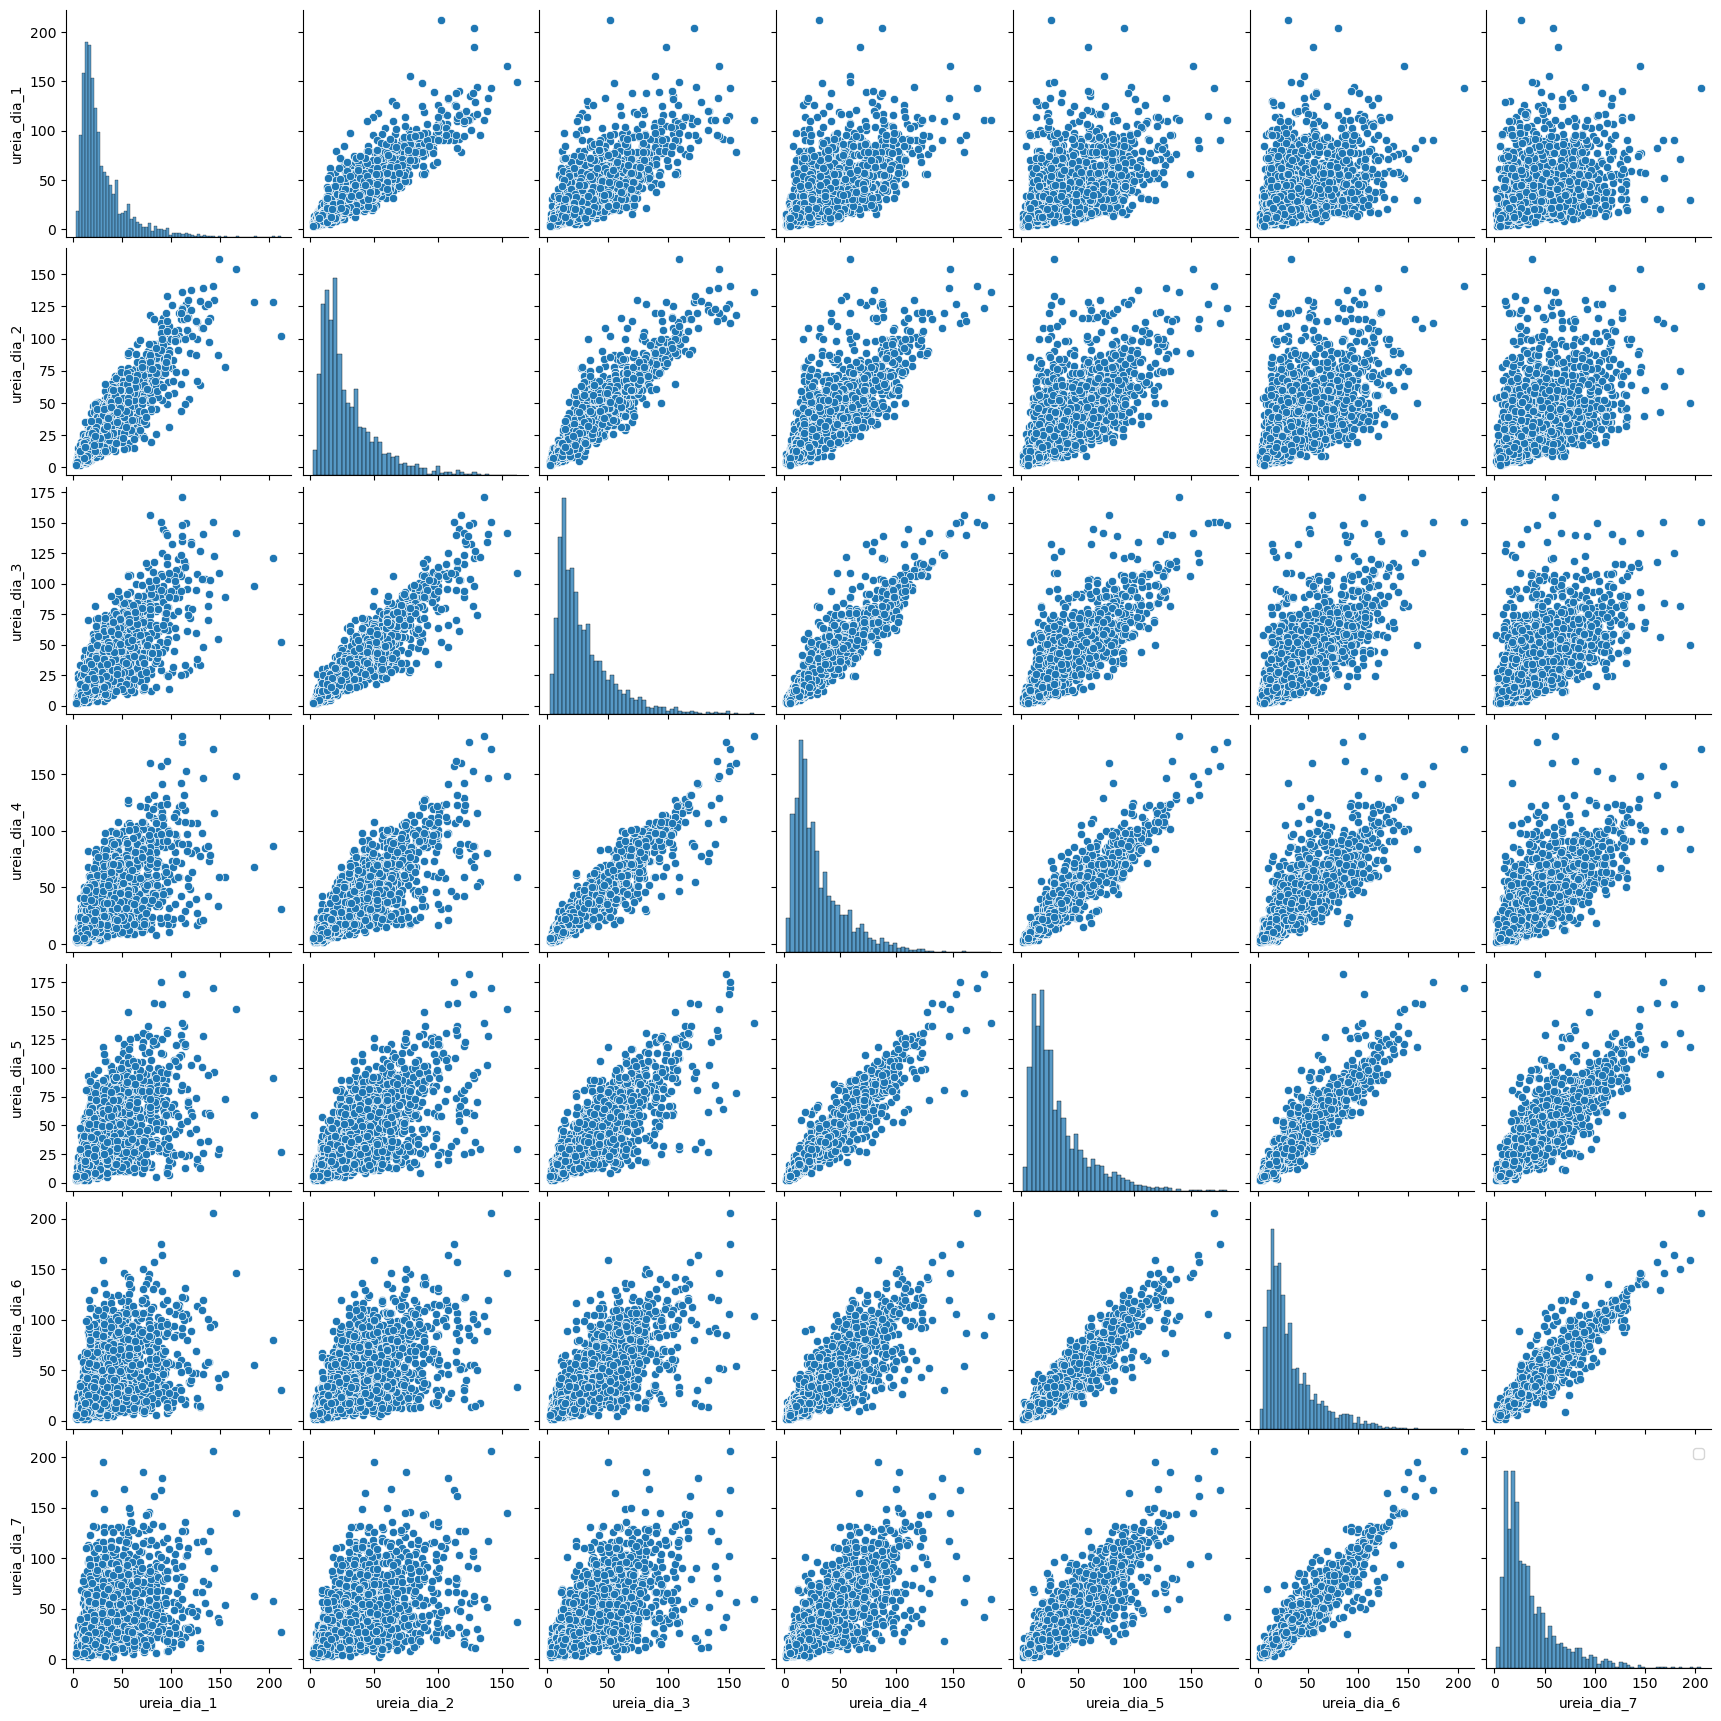

In [28]:
plt.figure(figsize = (12, 9))

sns.pairplot(novo_df_ureia_tratado)

plt.legend()
plt.show()

/tmp/ipykernel_26242/2700642342.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


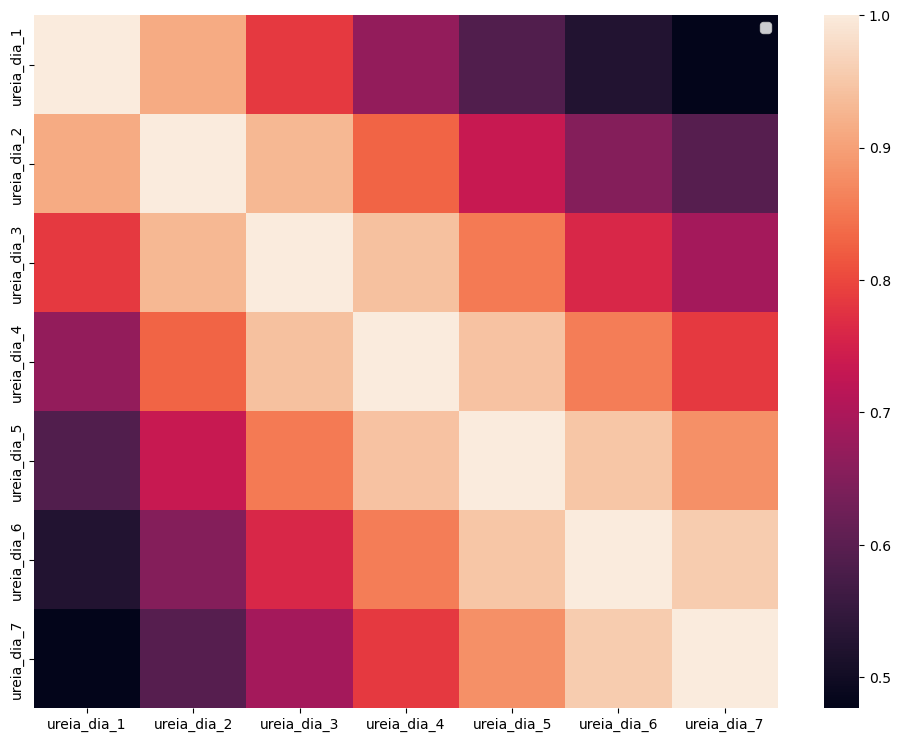

In [27]:
plt.figure(figsize = (12, 9))

sns.heatmap(novo_df_ureia_tratado.corr())

plt.legend()
plt.show()

### DATASET creatinina

#### Recebendo os hiper-parâmetros testados acima

In [19]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "creatinina")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [20]:
bandwidth = estimate_bandwidth(X = novo_df_creatinina_tratado,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica(),
                               n_jobs = -1)

meanshift_creatinina = Meanshift(bandwidth = bandwidth,
                                 usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                 frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                 clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                 nro_threads = hiperparametros_meanshift.getNro_threads(),
                                 nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_creatinina.fit(novo_df_creatinina_tratado)
y_creatinina = meanshift_creatinina.predict(novo_df_creatinina_tratado)

##### Verificando resultados do modelo

In [21]:
if len(np.unique(meanshift_creatinina.getLabels())) > 1:
    silhouette = silhouette_score(novo_df_creatinina_tratado, y_creatinina, metric = "cityblock")
    davies_bouldin = davies_bouldin_score(novo_df_creatinina_tratado, y_creatinina)
    calinski = calinski_harabasz_score(novo_df_creatinina_tratado, y_creatinina)

    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.5801834966250604
DAVIS-BOULDIN SCORE:  1.026398732845701
CALINSKI-HARABASZ SCORE:  264.4860216499835


##### Quantidade de grupos gerado

In [22]:
print("Quantidade de Grupos:", len(np.unique(y_creatinina)))

Quantidade de Grupos: 25


##### Versão Gráfica

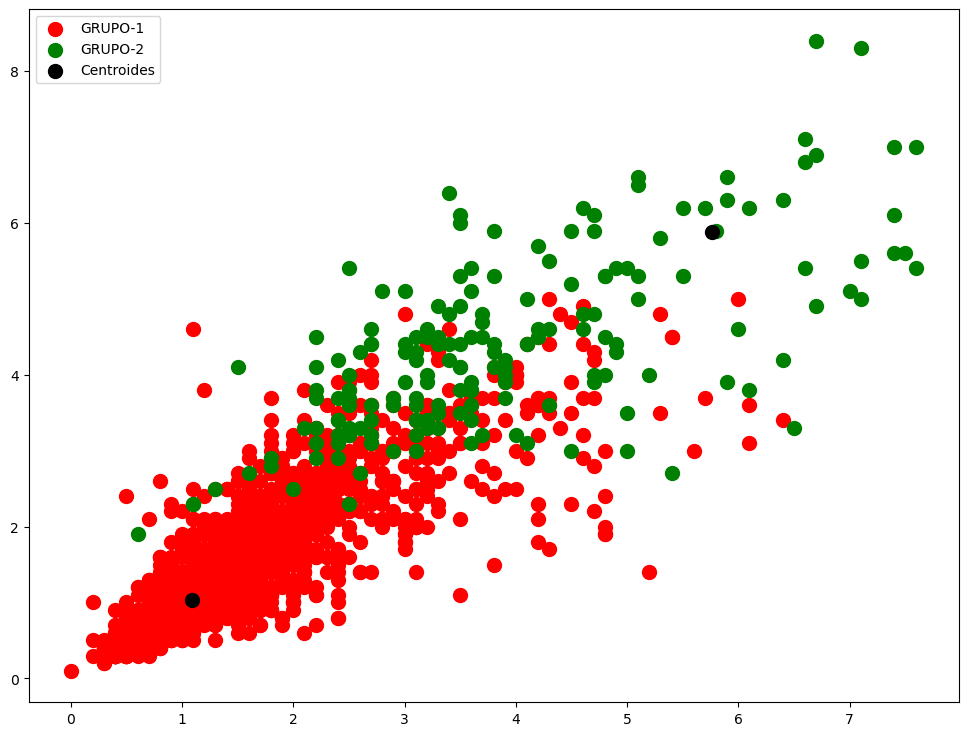

In [23]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(novo_df_creatinina_tratado.values[y_creatinina == 0, 0], novo_df_creatinina_tratado.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(novo_df_creatinina_tratado.values[y_creatinina == 1, 0], novo_df_creatinina_tratado.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(meanshift_creatinina.getCentroides()[0:2, 0], meanshift_creatinina.getCentroides()[0:2, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

/tmp/ipykernel_26242/36580437.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1200x900 with 0 Axes>

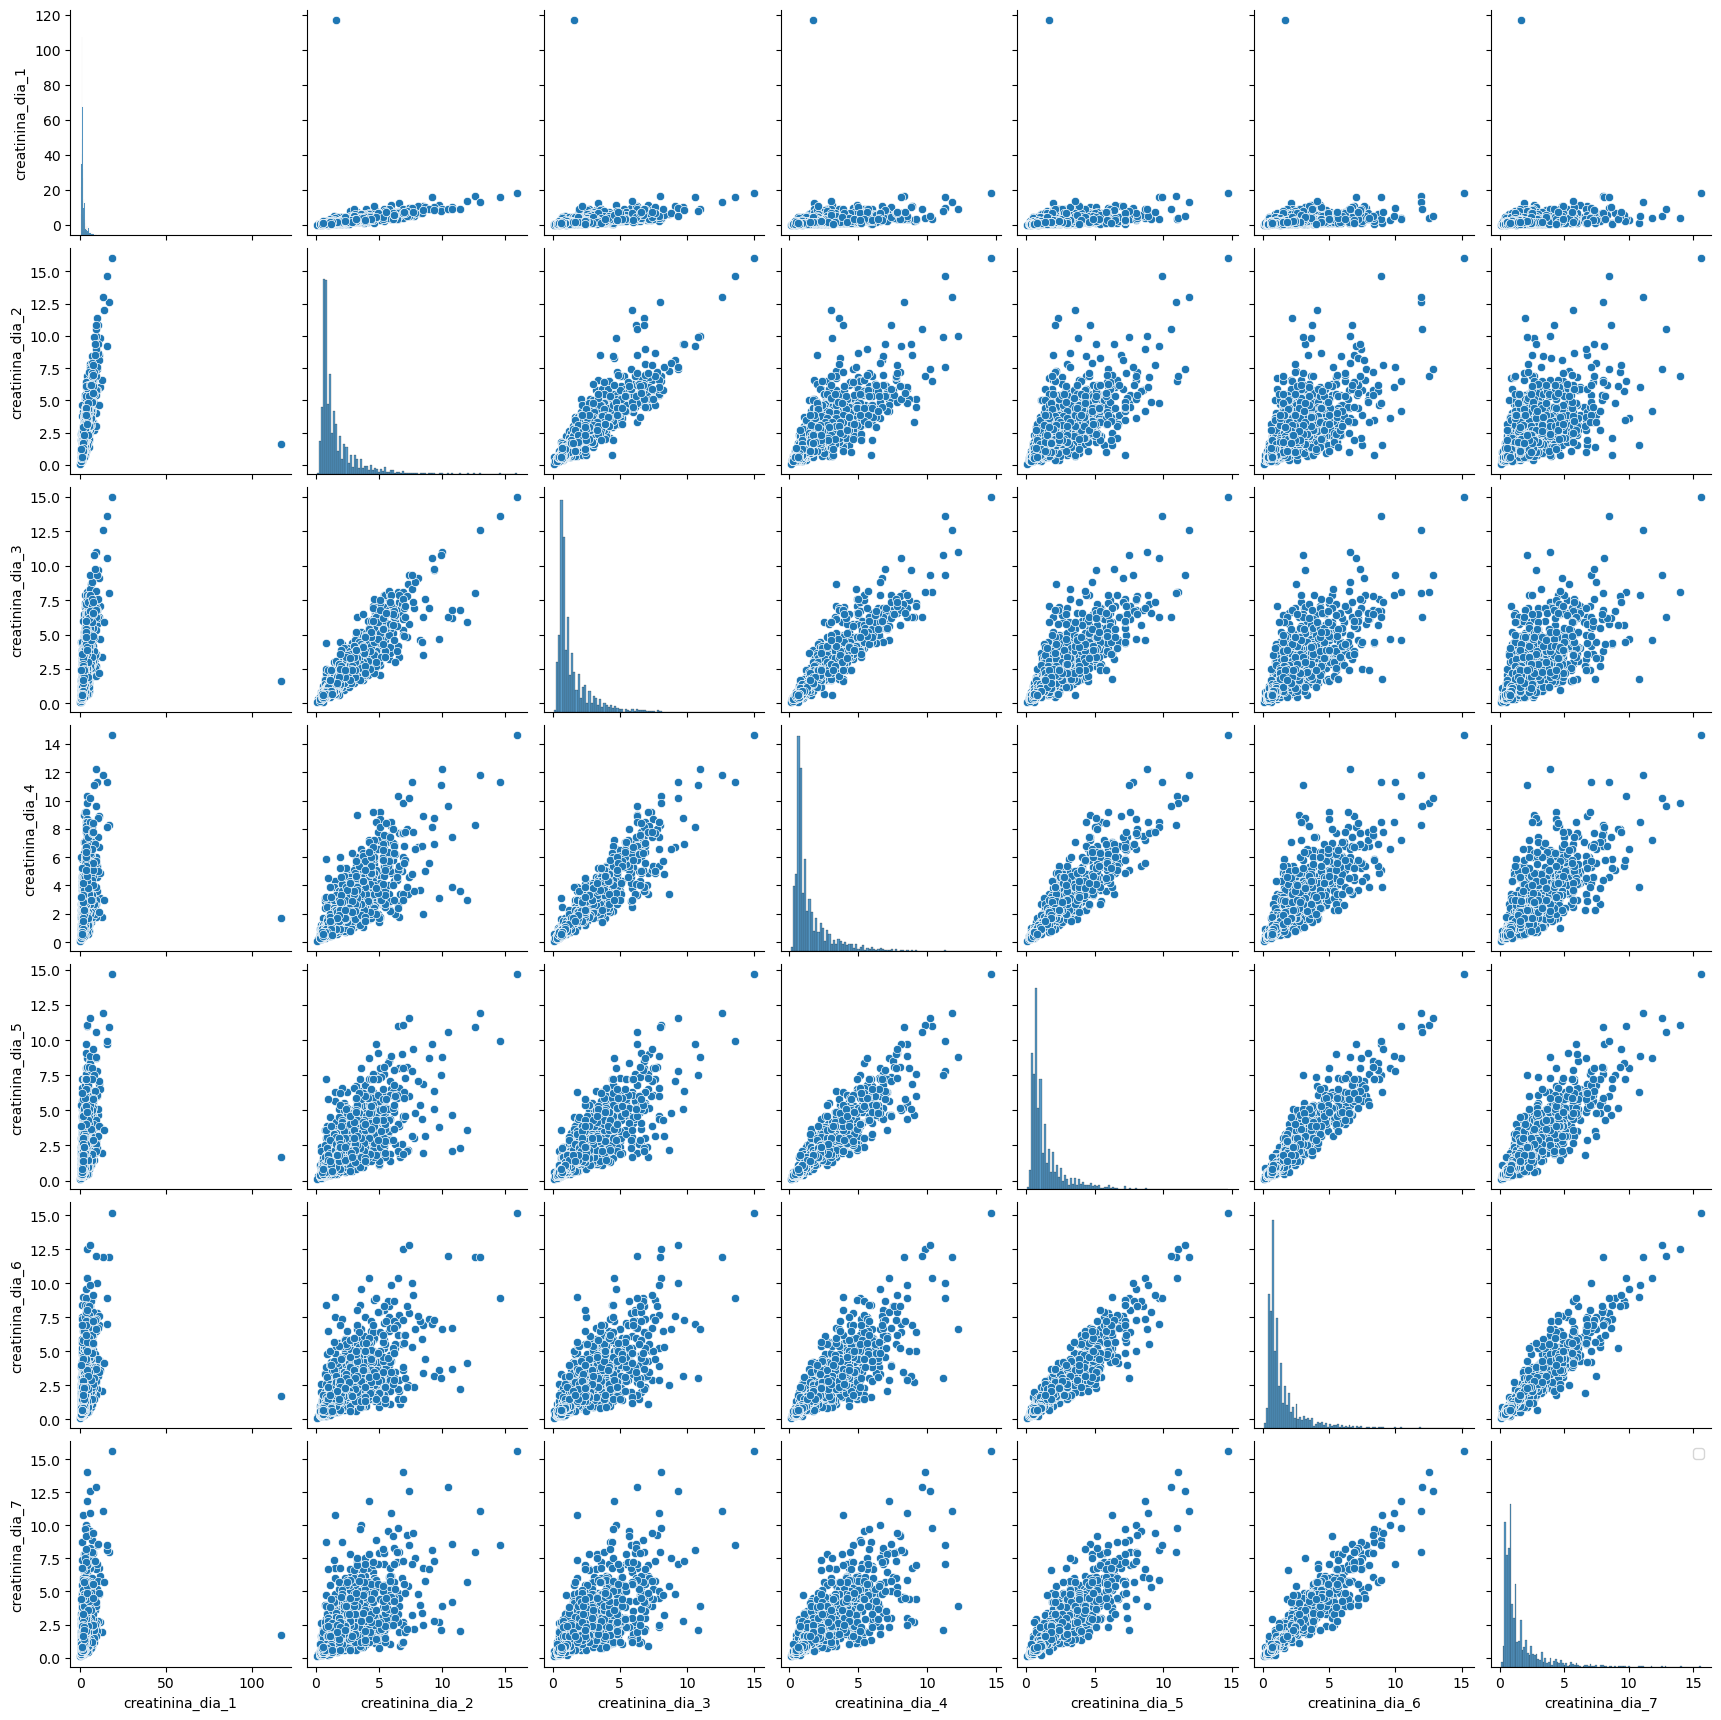

In [25]:
plt.figure(figsize = (12, 9))

sns.pairplot(novo_df_creatinina_tratado)

plt.legend()
plt.show()

/tmp/ipykernel_26242/3690068695.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


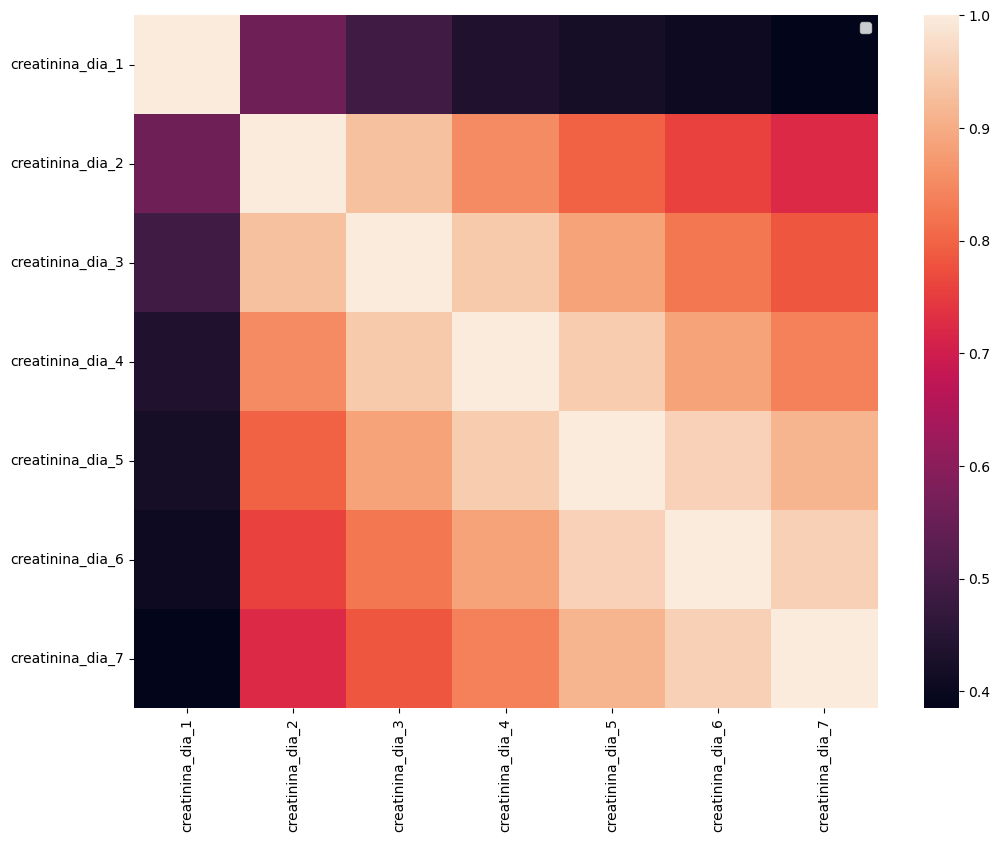

In [26]:
plt.figure(figsize = (12, 9))

sns.heatmap(novo_df_creatinina_tratado.corr())

plt.legend()
plt.show()